In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv('data.csv')

In [55]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [56]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [57]:
df.shape

(7043, 21)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7042 non-null   object 
 2   SeniorCitizen     7039 non-null   float64
 3   Partner           7040 non-null   object 
 4   Dependents        7039 non-null   object 
 5   tenure            7041 non-null   float64
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7040 non-null   object 
 8   InternetService   7040 non-null   object 
 9   OnlineSecurity    7041 non-null   object 
 10  OnlineBackup      7042 non-null   object 
 11  DeviceProtection  7041 non-null   object 
 12  TechSupport       7041 non-null   object 
 13  StreamingTV       7038 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7041 non-null   object 
 16  PaperlessBilling  7042 non-null   object 


We can notice that the data type for the TotalCharges is object when it should be float.

In [59]:
df['TotalCharges']=df['TotalCharges'].replace(" ",0).astype('float32')

In [60]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('category')

In [61]:
df['TotalCharges'].dtype

dtype('float32')

In [62]:
df.drop(columns=['customerID'],inplace=True)

In [63]:
ls = list(df.select_dtypes(include='object').columns)
d=pd.DataFrame()
for i in ls:
    val = ', '.join(map(str, df[i].dropna().unique()))  # Convert to strings and drop NaNs
    n = df[i].nunique()
    d = pd.concat(
        [d, pd.DataFrame({'Columns': [i], 'Nunique': n, 'Unique Values': [val]})],
        ignore_index=True
    )
d 

,Columns,Nunique,Unique Values
0,gender,2,"Female, Male"
1,Partner,2,"Yes, No"
2,Dependents,2,"No, Yes"
3,PhoneService,2,"No, Yes"
4,MultipleLines,3,"No phone service, No, Yes"
5,InternetService,3,"DSL, Fiber optic, No"
6,OnlineSecurity,3,"No, Yes, No internet service"
7,OnlineBackup,3,"Yes, No, No internet service"
8,DeviceProtection,3,"No, Yes, No internet service"
9,TechSupport,3,"No, Yes, No internet service"


In [64]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7041.000000,7043.000000,7037.000000
mean,32.467263,65.005388,2294.209229
std,24.807832,30.768585,2293.812012
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,399.450012
50%,29.000000,70.350000,1398.250000
75%,55.000000,89.900000,3808.199951
max,183.000000,253.000000,13967.000000


Tenure:             The mean is greater than median thus it might be positively skewed with most of the vlaues lying 10-50 magnitude\
Monthly Charges:    The Median is slightly greater than the mean thus negatively skewed with most of the values in range of 34-90.\
Total Charges  :    The Mean is way greater than median thus positively skewd with the most of the value in range 400-3000.

### Removing Duplicates and Nulls

In [65]:
df.duplicated().sum()

22

In [66]:
df.drop_duplicates(keep='first',inplace=True)

In [67]:
df.reset_index(drop=True,inplace=True)

In [68]:
df.isnull().sum()

gender              1
SeniorCitizen       4
Partner             3
Dependents          4
tenure              2
PhoneService        3
MultipleLines       3
InternetService     3
OnlineSecurity      2
OnlineBackup        1
DeviceProtection    2
TechSupport         2
StreamingTV         5
StreamingMovies     0
Contract            2
PaperlessBilling    1
PaymentMethod       4
MonthlyCharges      0
TotalCharges        6
Churn               2
dtype: int64

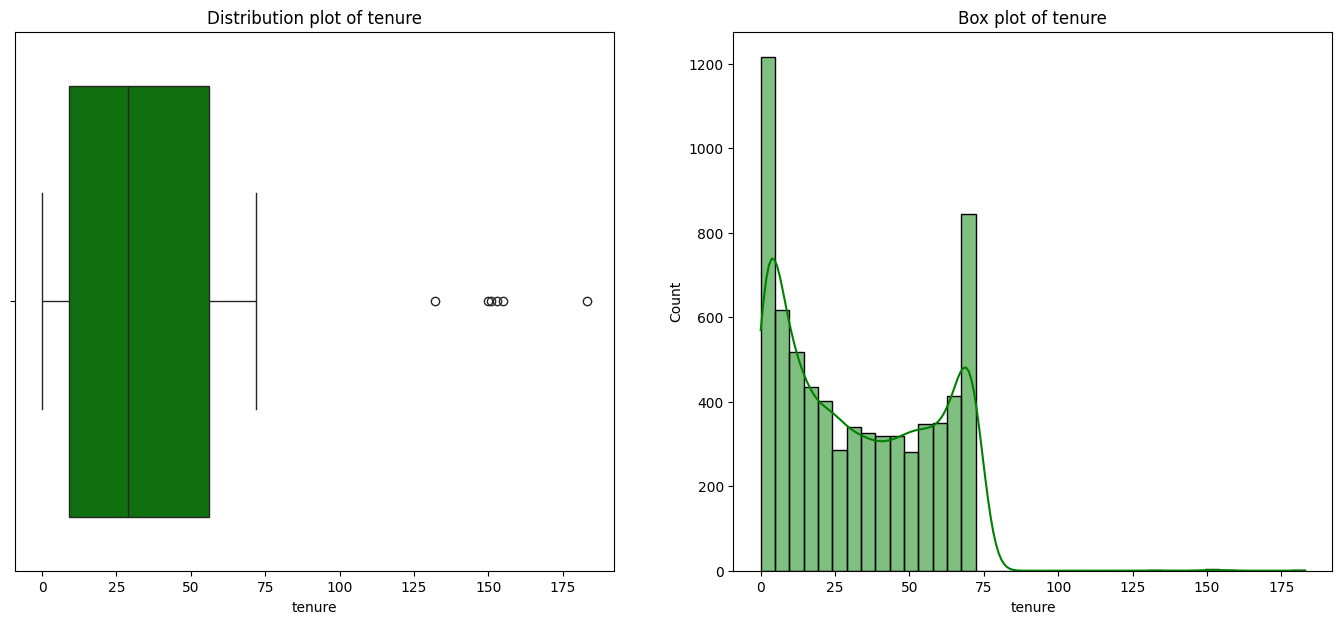

 Total Number of outliers in tenure: 0


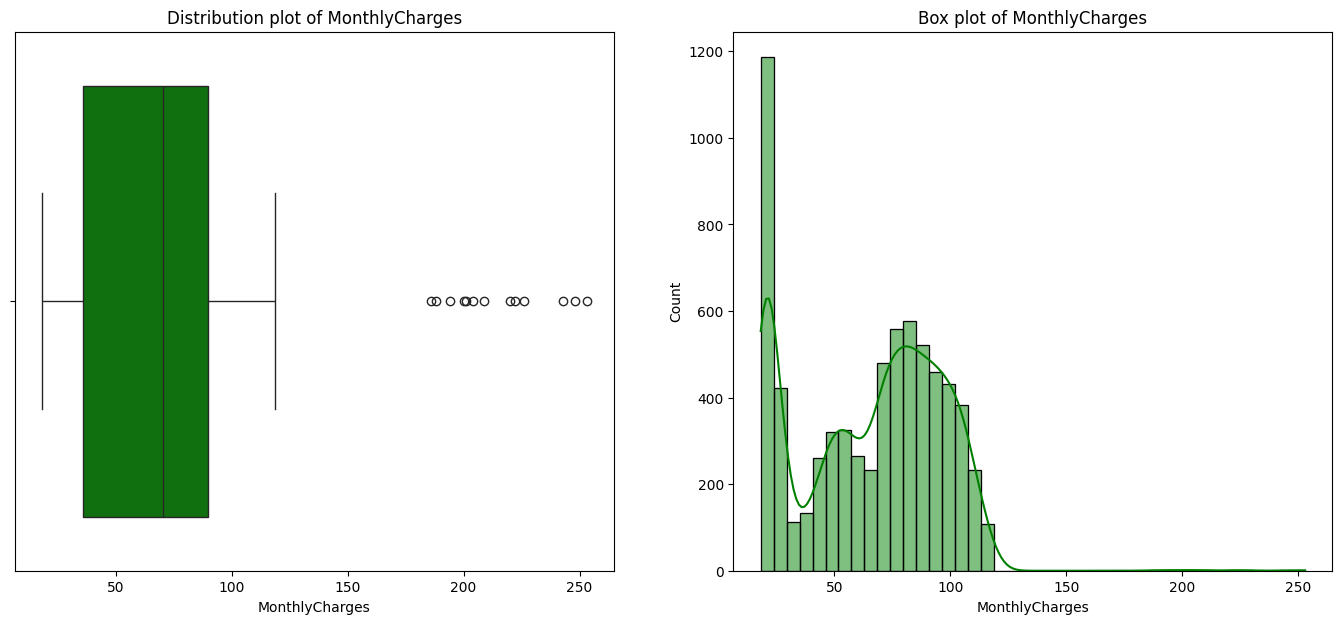

 Total Number of outliers in MonthlyCharges: 13


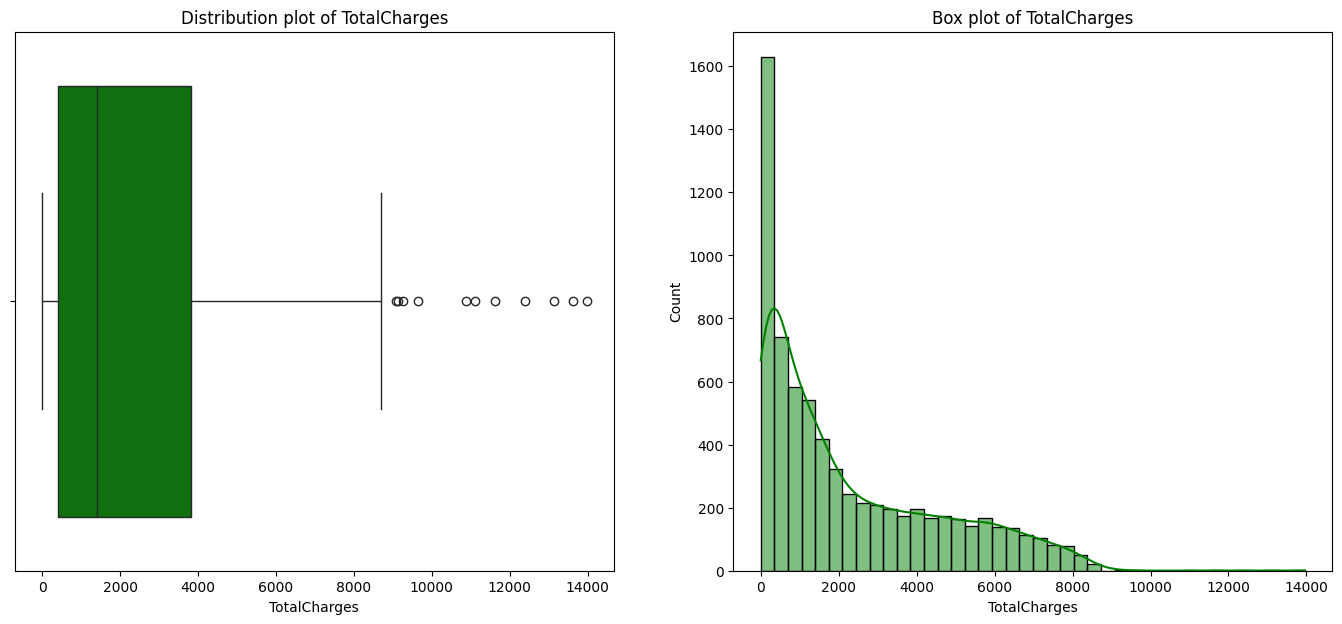

 Total Number of outliers in TotalCharges: 0


In [69]:
for i in df.select_dtypes(include=['int64','float64','float32']).columns:
    f, axes = plt.subplots(1, 2, figsize=(17,7))
    sns.boxplot(x = i, data=df,  orient='h' , ax=axes[0],color="Green")
    sns.histplot(df[i],kde=True,  ax=axes[1],color='Green')
    axes[0].set_title('Distribution plot of {}'.format(i))
    axes[1].set_title('Box plot of {}'.format(i))
    plt.show()
    #checking count of outliers.
    q25,q75=np.percentile(df[i],25),np.percentile(df[i],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[i] if i < lower or i > upper]
    print('{} Total Number of outliers in {}: {}'.format('\033[1m',i,len(Outliers)))

Tenure: Not normally distributed, has 2 peaks in distribution. \
No Outlier, has most of the values between 10-55. \
Monthly Charges:Not normally distributed, has 3 peaks in distribution. \
13 Outlier, has most of the values between 10-120. \
Total Charges: Normally distributed with Positive skewness.\
13 Outlier, has most of the values upto 4000. 

#### Distribution of Categorical Values

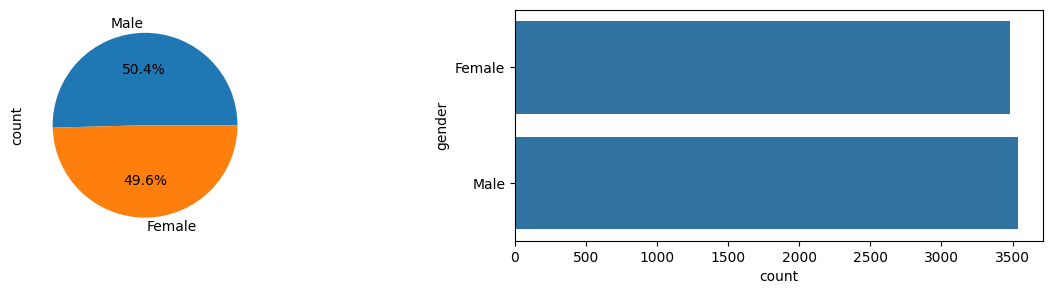

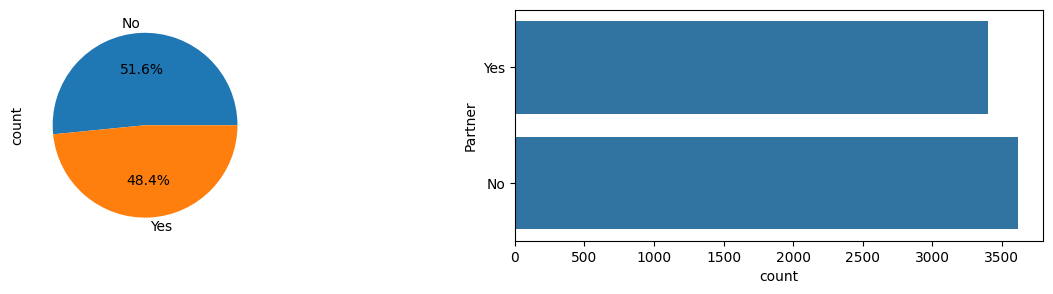

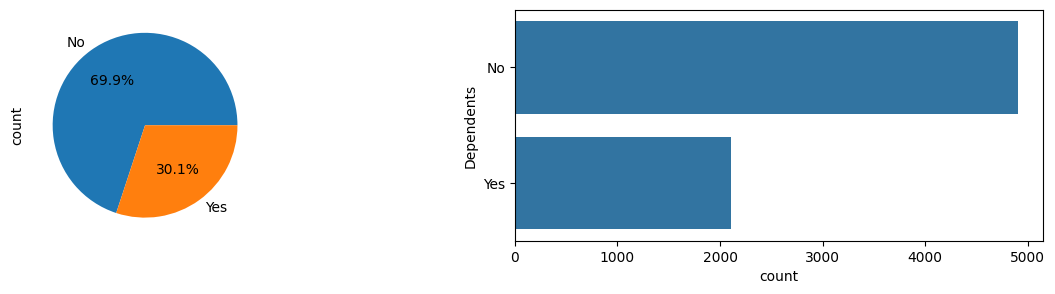

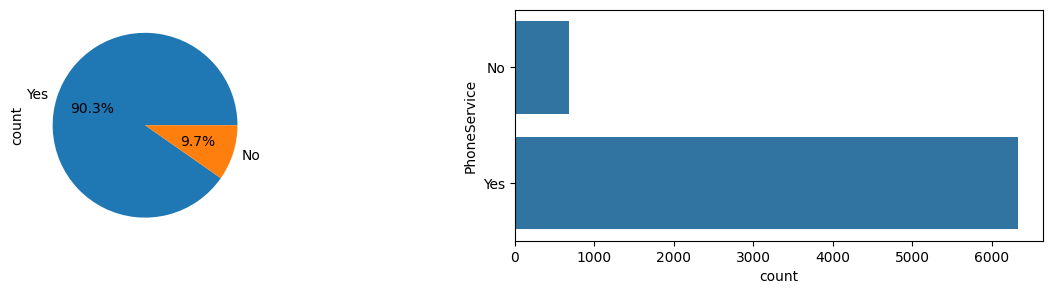

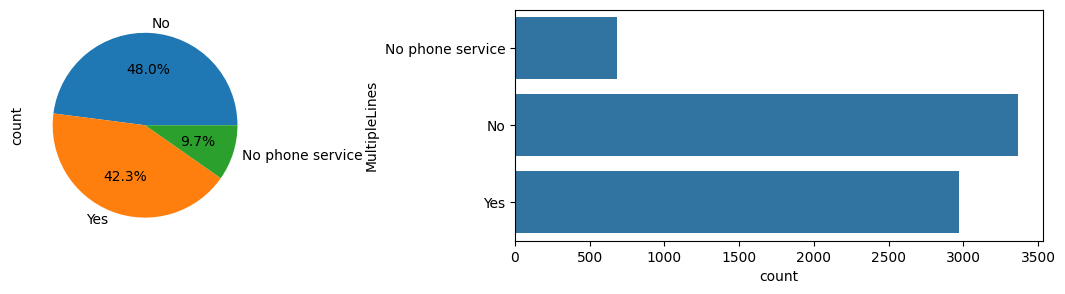

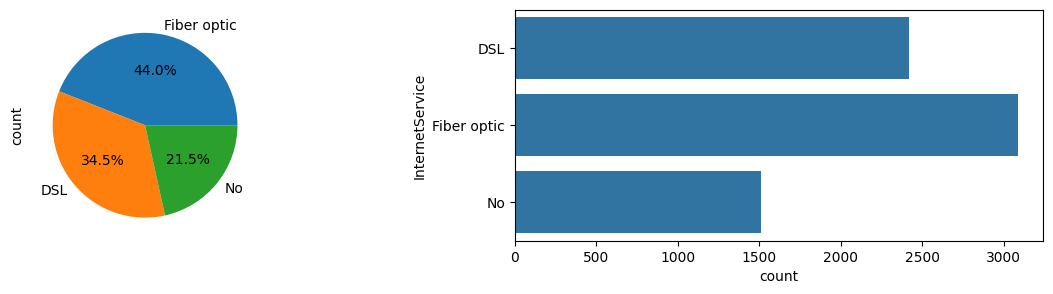

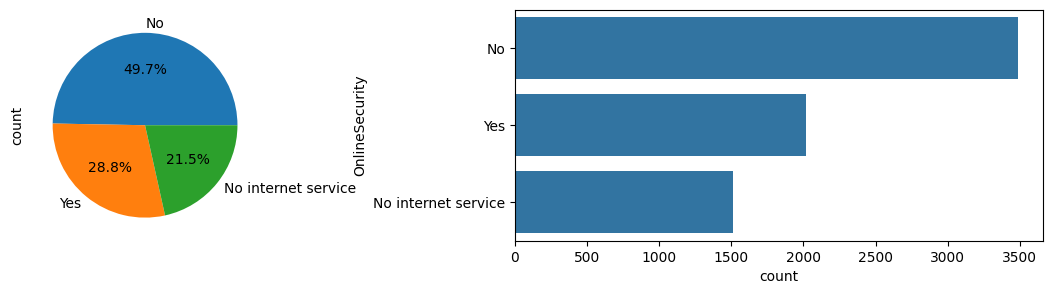

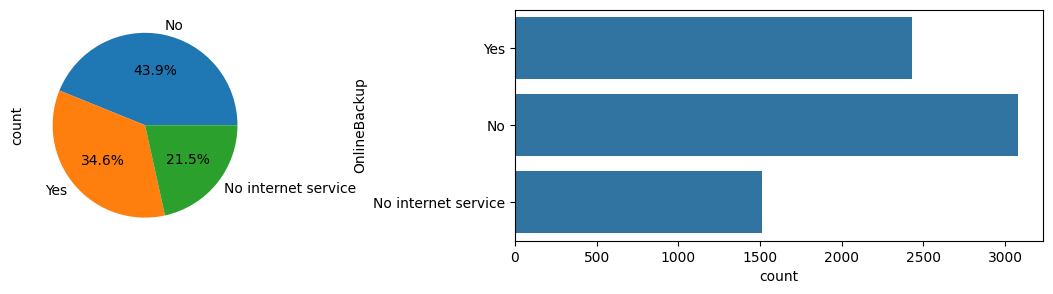

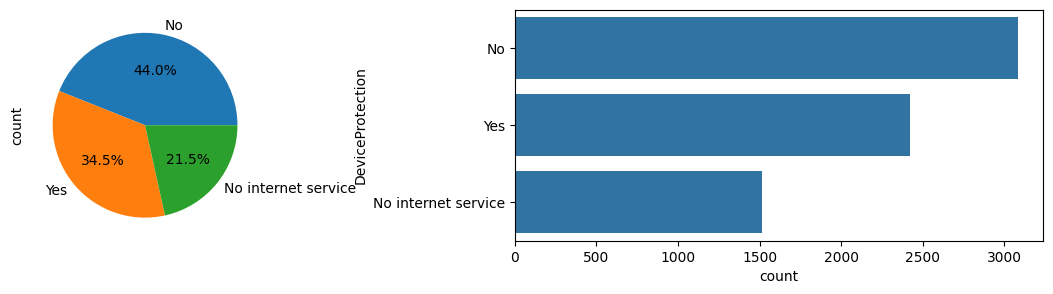

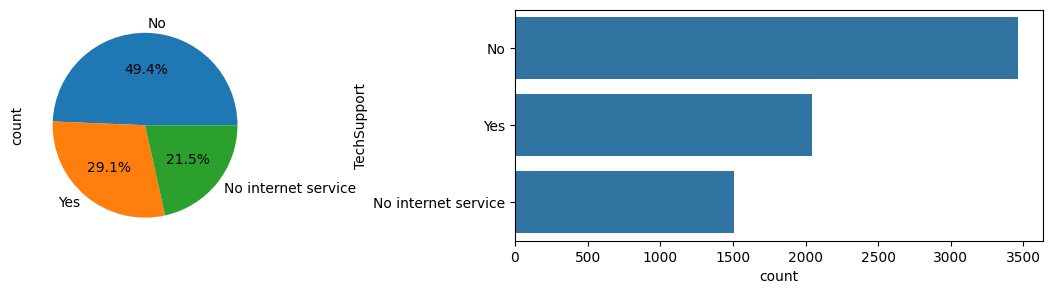

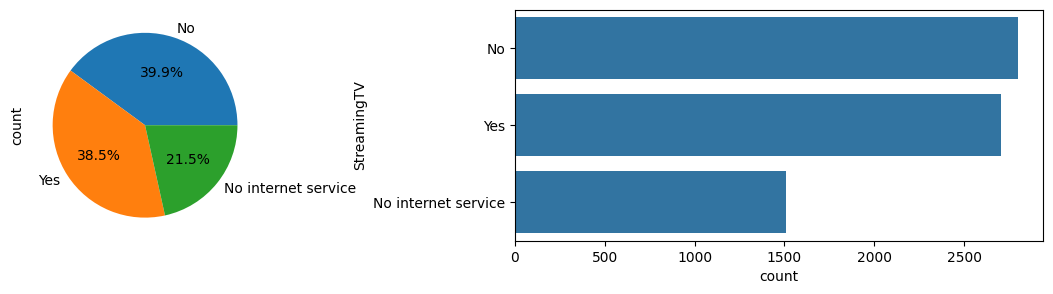

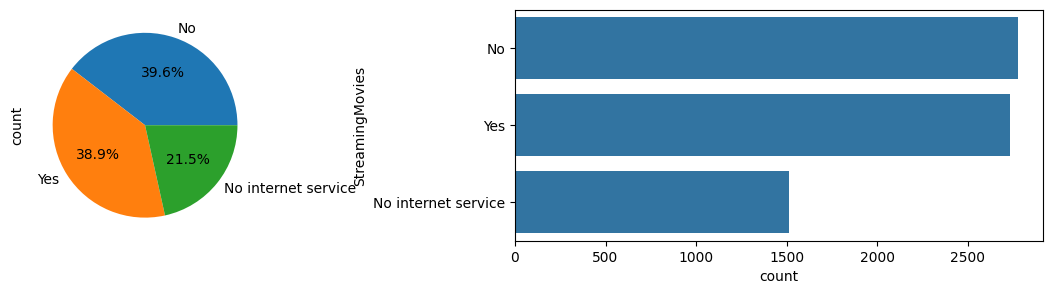

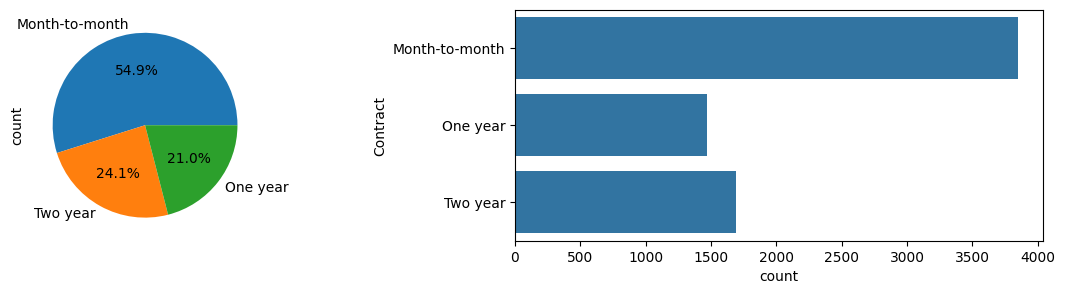

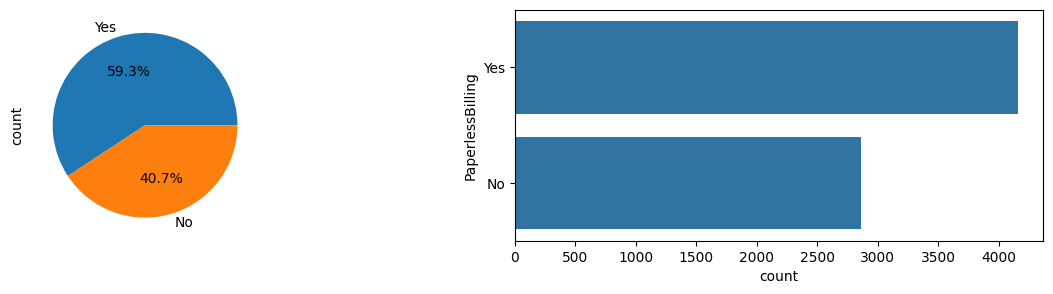

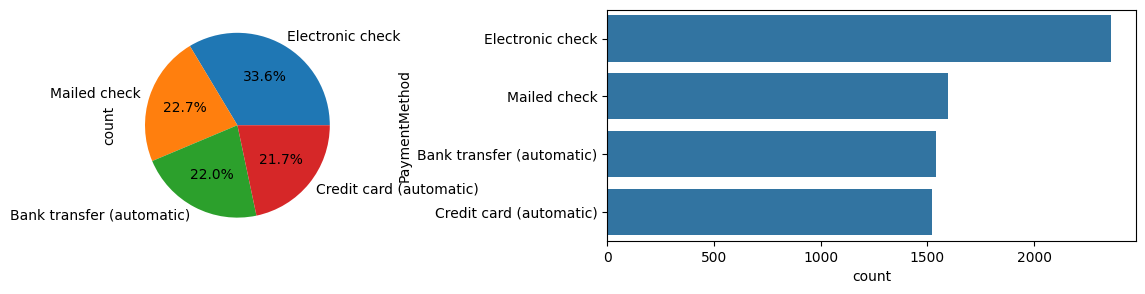

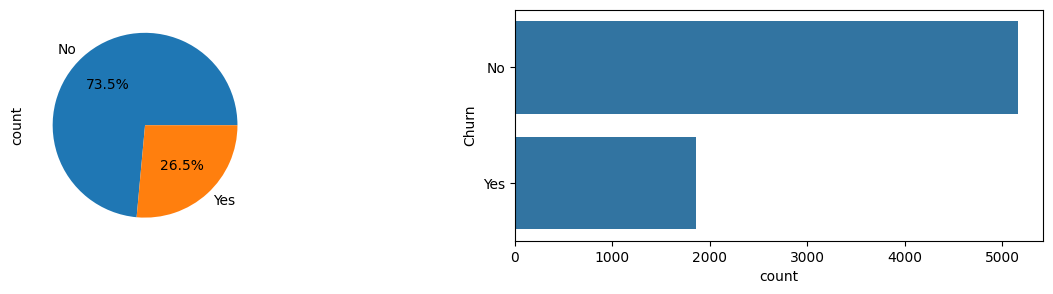

In [70]:
for col in df.select_dtypes(include='object').columns:
    f,axes=plt.subplots(1,2,figsize=(15,3))
    df[col].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
    sns.countplot(df[col],ax=axes[1])

Not every Category type column has equal number of data point for each category.

### Bivariate Analysis
<b>Numerical vs Numerical</b>

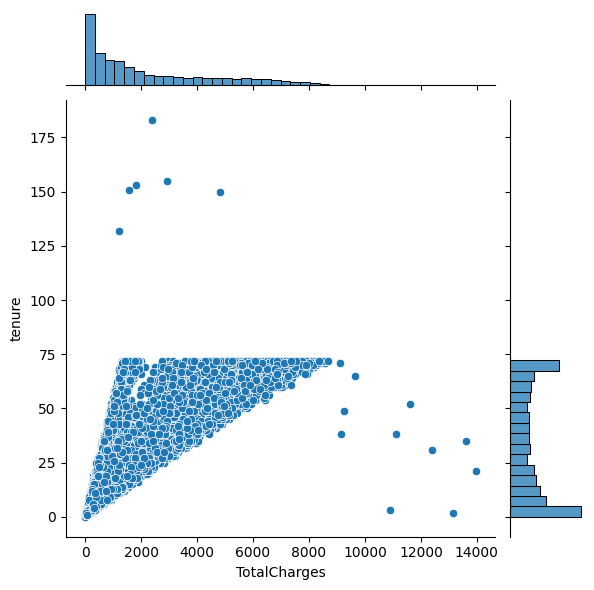

In [71]:
sns.jointplot(x=df['TotalCharges'],y=df['tenure'])

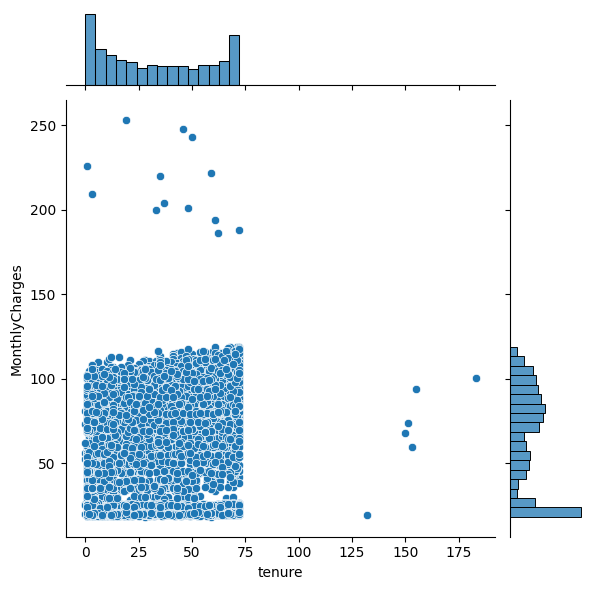

In [72]:
sns.jointplot(x=df['tenure'],y=df['MonthlyCharges'])

<Axes: xlabel='tenure', ylabel='TotalCharges'>

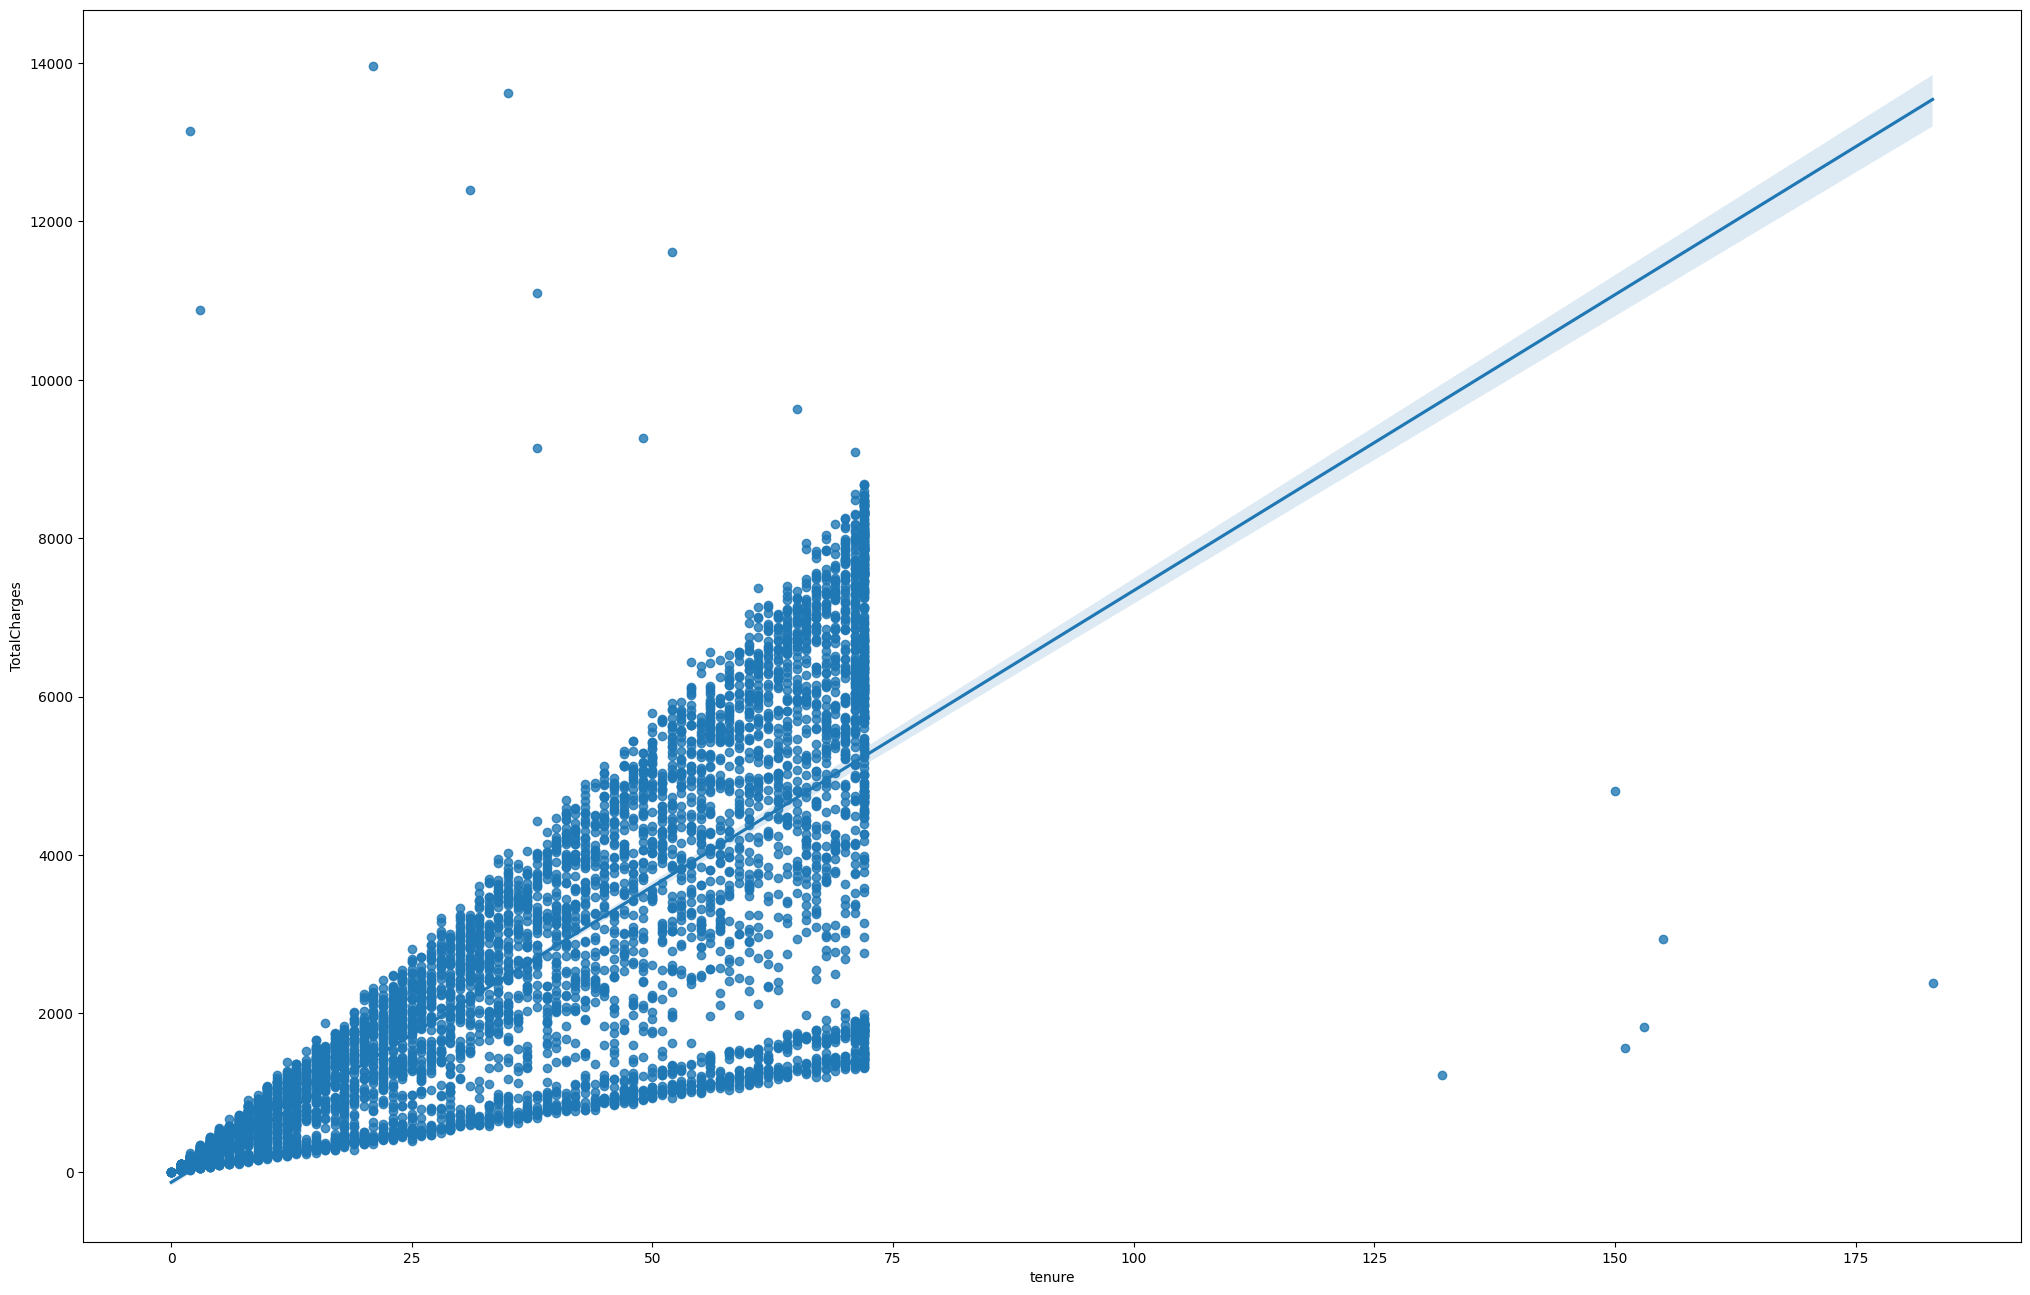

In [73]:
plt.figure(figsize=(25,16))
sns.regplot(x=df['tenure'],y=df['TotalCharges'])

<Axes: >

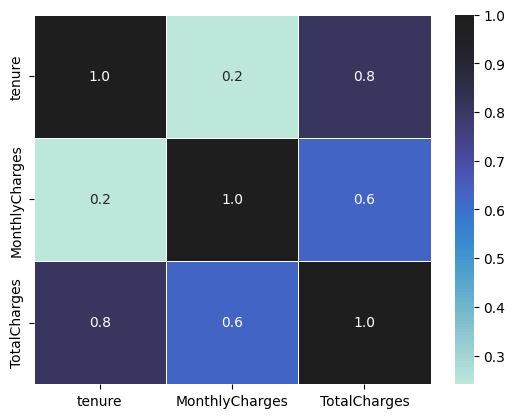

In [74]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,linewidths=.5,fmt='.1f',center=1)

As we can see that tenure has pretty high correlation with TotalCharges.

#### Categorical Vs Numerical

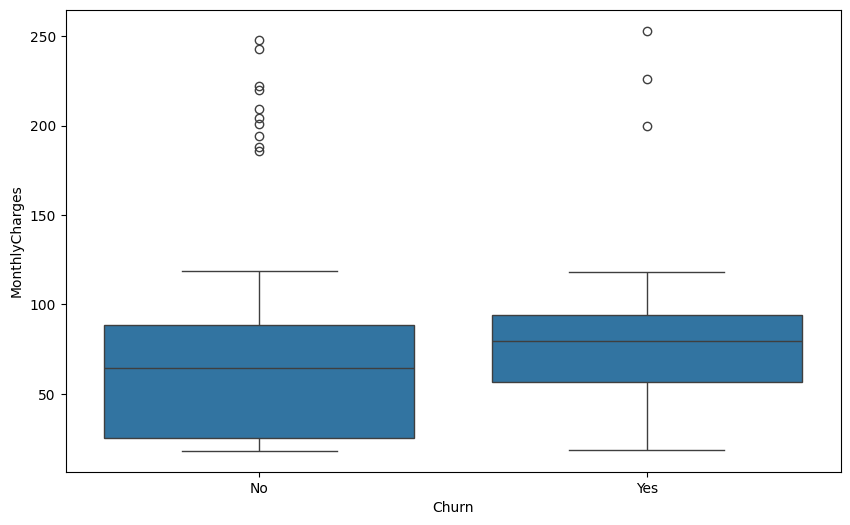

In [75]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Churn'],y=df['MonthlyCharges'])
plt.show()

Monthly charges for Churn is more.

In [76]:
df['Churn']=df['Churn'].astype('category')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

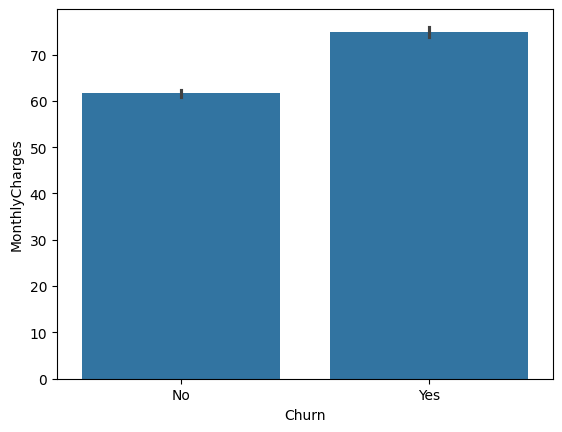

In [101]:
sns.barplot(data=df, x='Churn', y='MonthlyCharges')

Mean measure of Monthly Charges are lower for customer without Churn.

#### Total Charges Vs Churn

<Axes: xlabel='Churn', ylabel='TotalCharges'>

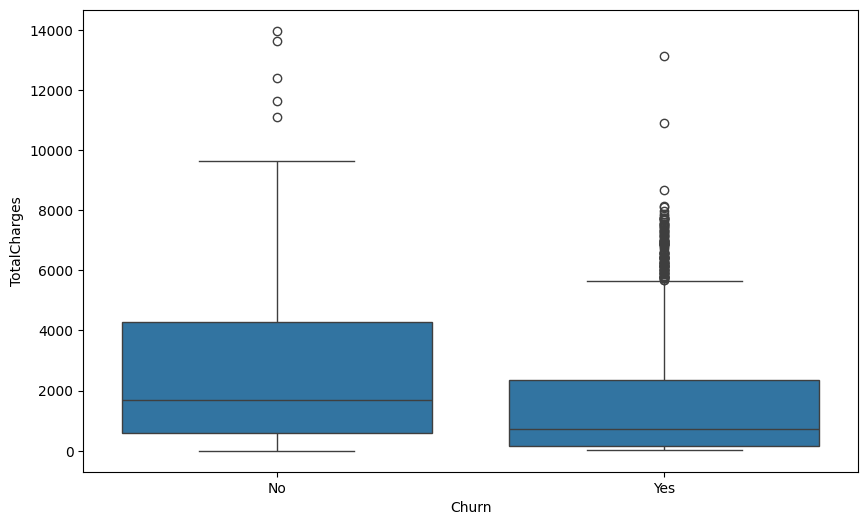

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Churn'],y=df['TotalCharges'])

Total Charges is more for people without Churn.

<Axes: xlabel='Churn', ylabel='TotalCharges'>

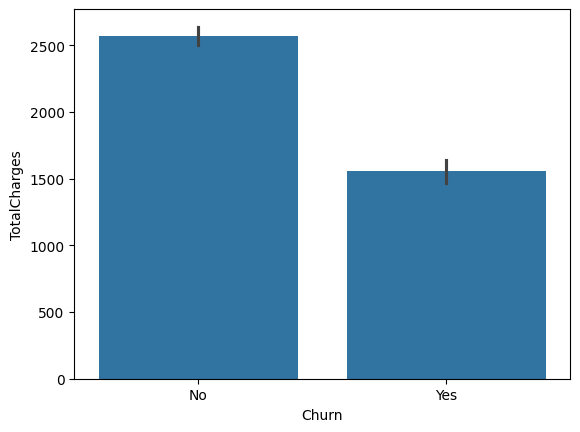

In [100]:
sns.barplot(data=df, x='Churn', y='TotalCharges')

Total Charges for those who churn is less.

#### Tenure Vs Churn

<Axes: xlabel='Churn', ylabel='tenure'>

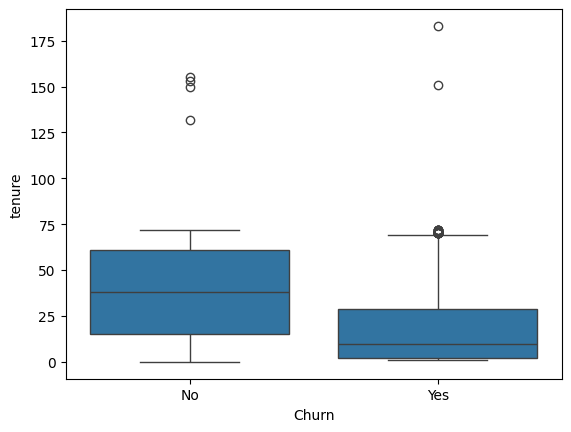

In [ ]:
sns.boxplot(y=df['tenure'],x=df['Churn'])

In [110]:
df['Churn'].replace(to_replace=dict(Yes=1,No=0),inplace=True)

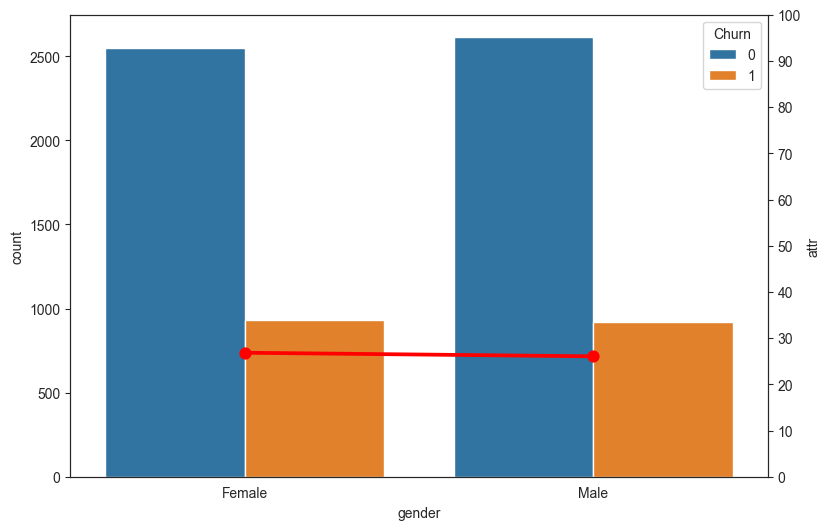

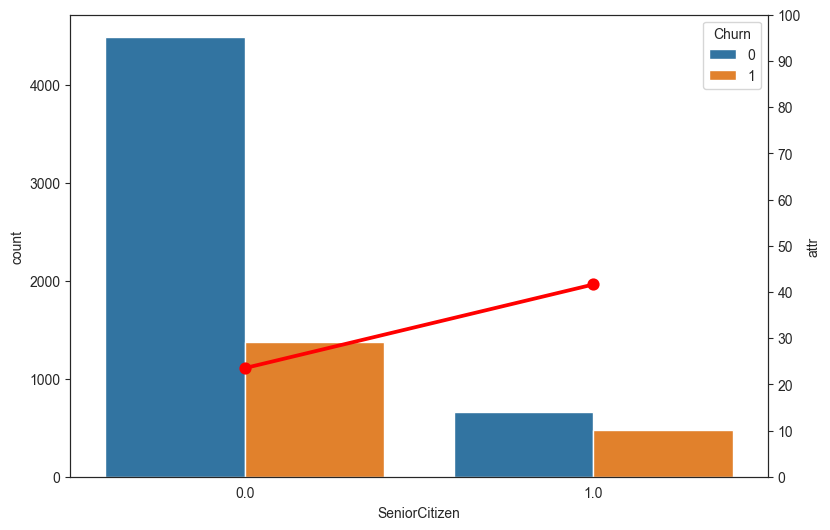

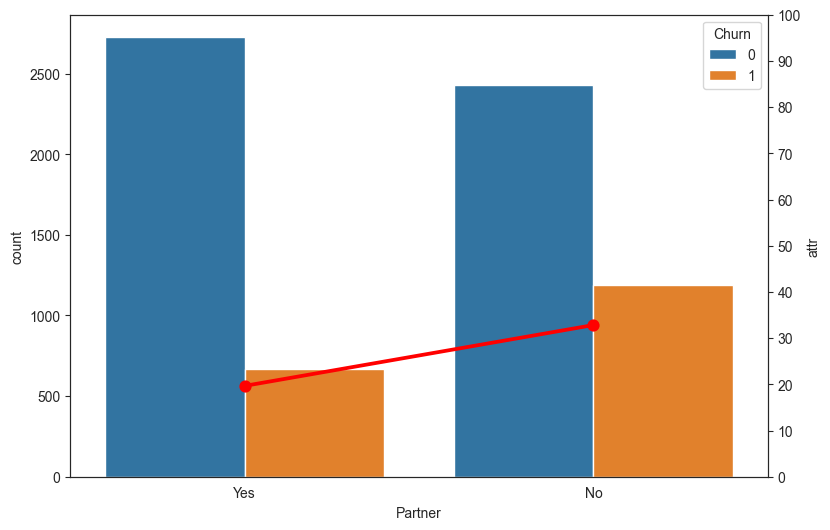

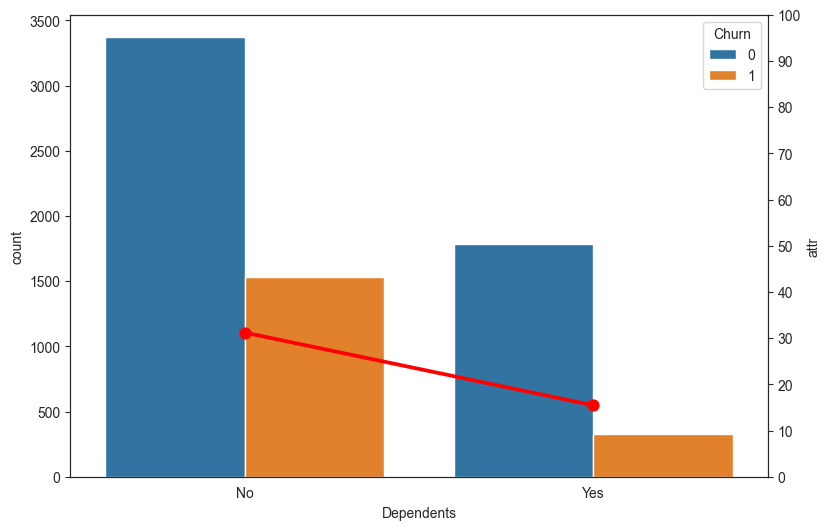

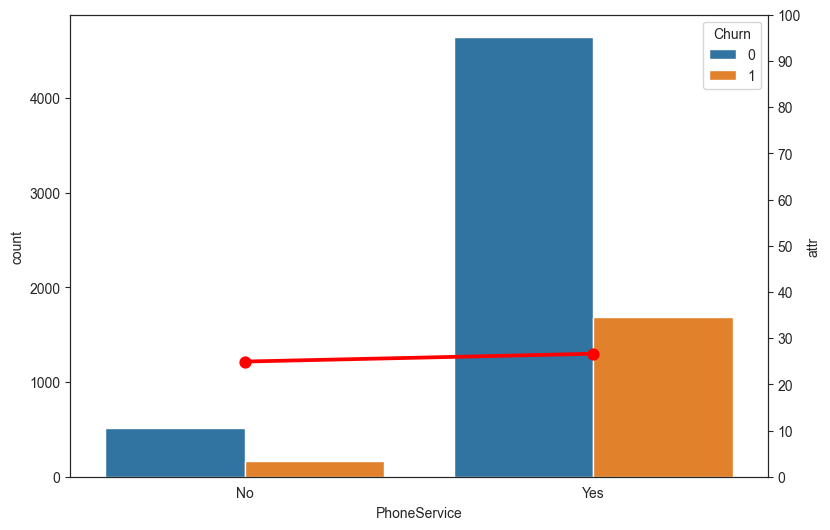

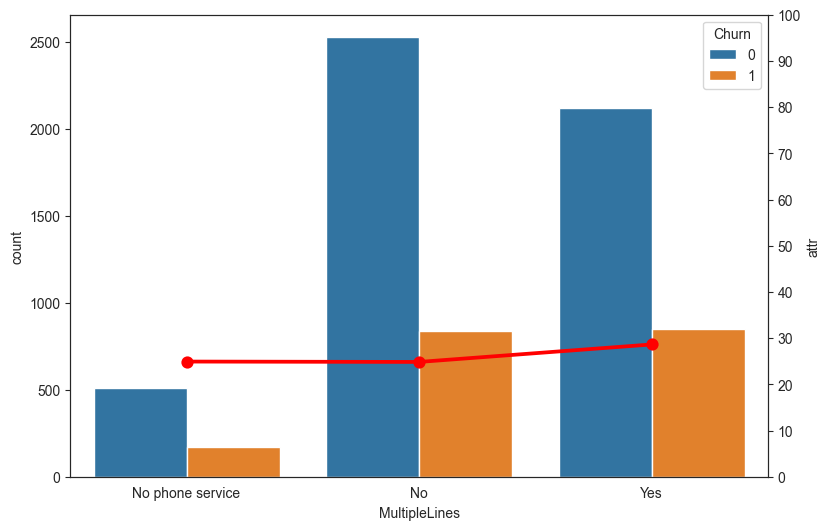

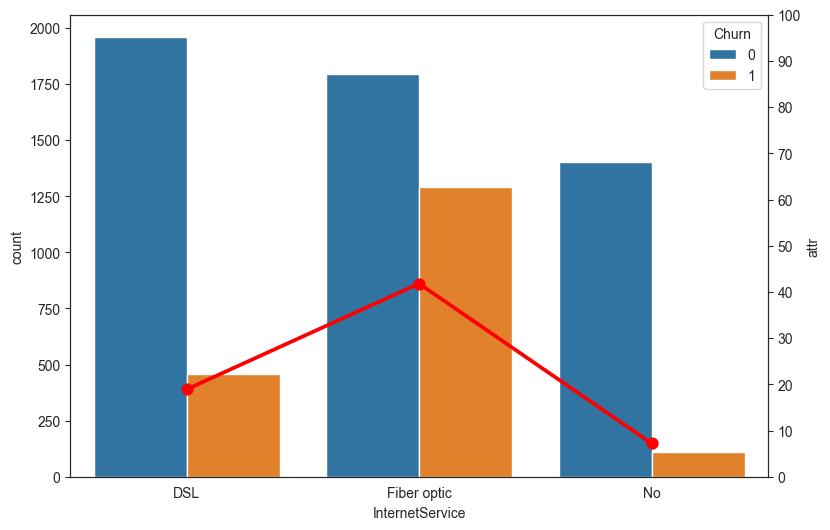

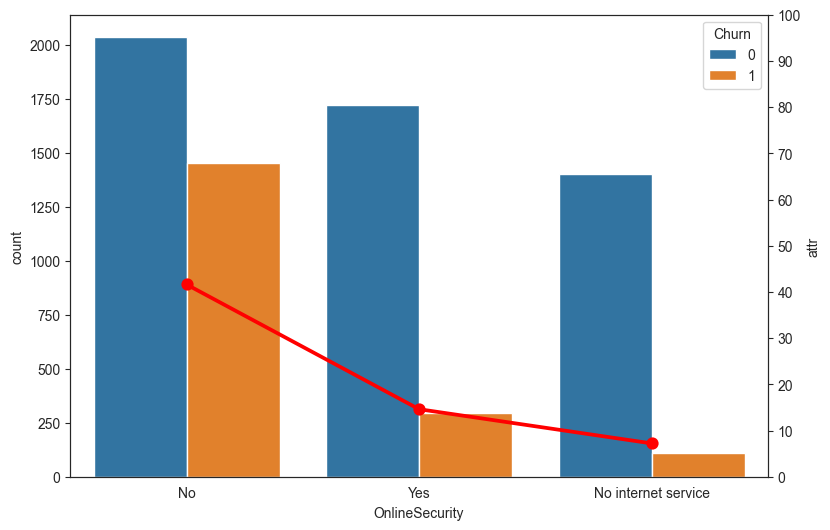

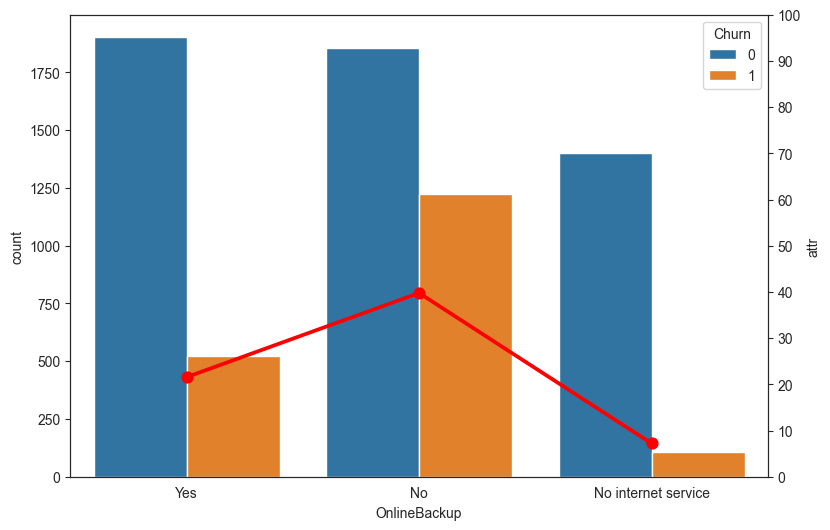

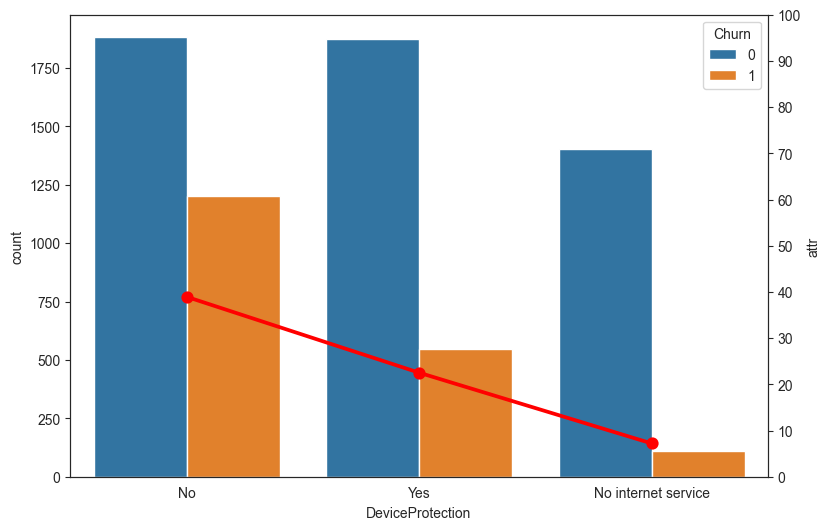

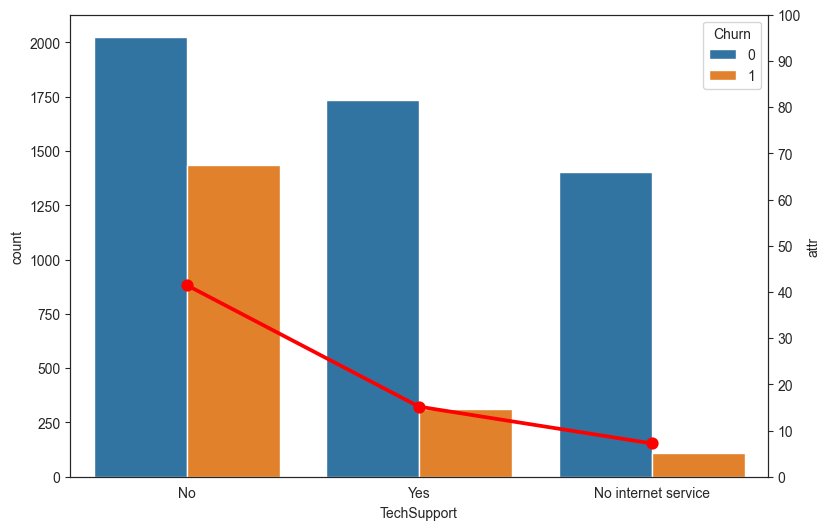

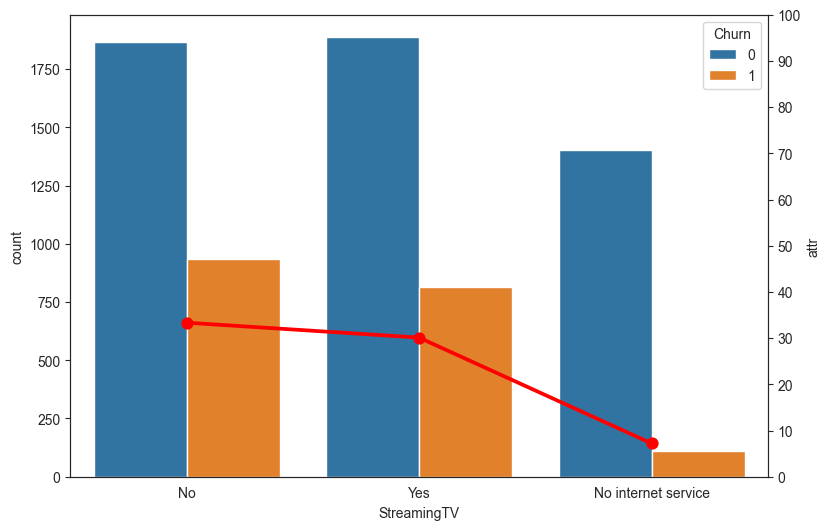

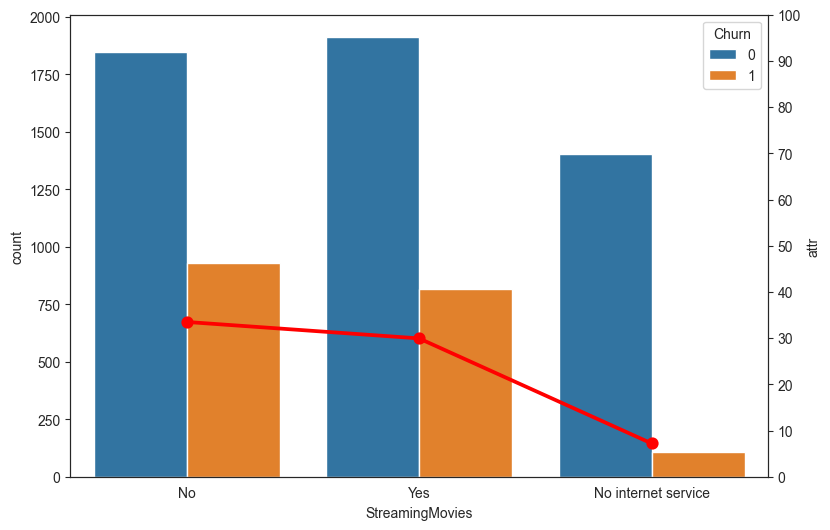

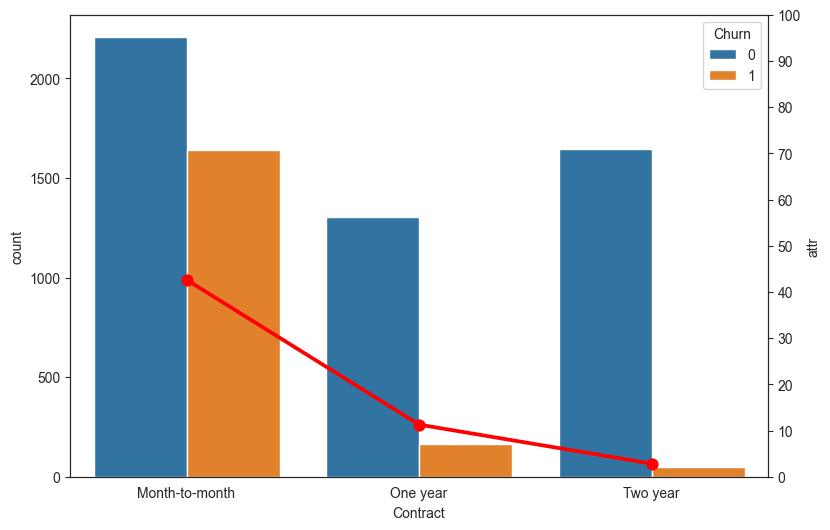

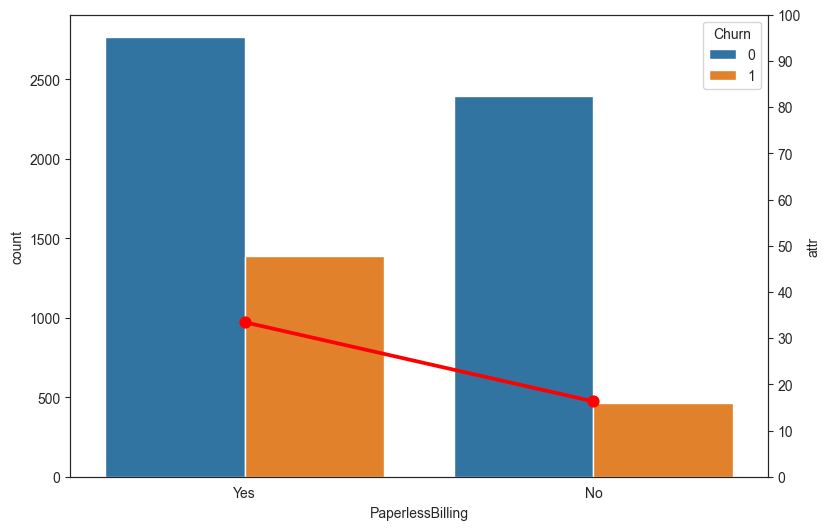

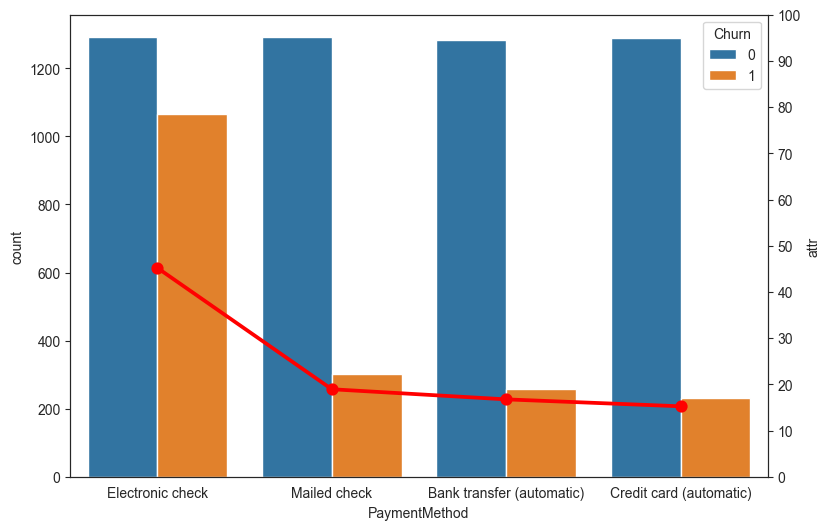

In [197]:
from matplotlib.ticker import MultipleLocator
l=df.select_dtypes(include=['category','object']).columns.values
l=l[l!='Churn']
for col in l:
    ct=pd.DataFrame(pd.crosstab(df[col],df['Churn']))
    ct['attr']=ct[1]/(ct[1]+ct[0])
    ct['attr']*=100
    sns.set_style('white')
    fig,ax1=plt.subplots(figsize=(9,6))
    sns.countplot(x=col, hue='Churn', data=df,ax=ax1)
    ax2=ax1.twinx()
    ax2.set_ylim(0,100)
    ax2.yaxis.set_major_locator(MultipleLocator(10))
    sns.pointplot(x=ct.index.values,y=ct['attr'],color='red',ax=ax2)



Here we can observe %Churn for different Categories and draw relevant Inferences about the Column.

In [209]:
l=len(df.select_dtypes(include=['object','category']).columns)
l

17